In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

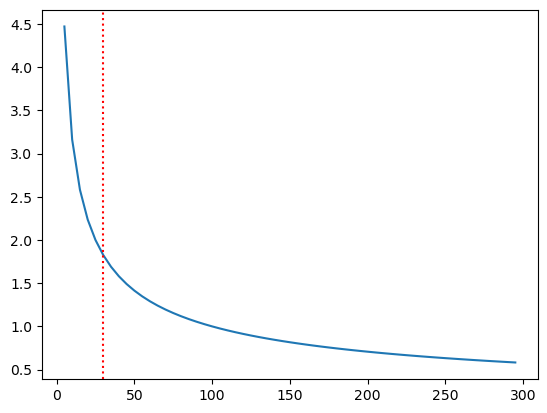

In [3]:
n_vec = np.arange(5, 300, 5)

def sem(sig, n):
    return sig / np.sqrt(n)

plt.plot(n_vec, sem(10, n_vec));
plt.axvline(30, ls=':', c='r')

In [4]:
path = 'https://raw.githubusercontent.com/jealcalat/AEM-ITESO/main/datasets/wages.csv'
datos = pd.read_csv(path)
datos.head()

,earn,height,sex,race,ed,age
0,79571.299011,73.89,male,white,16,49
1,96396.988643,66.23,female,white,16,62
2,48710.666947,63.77,female,white,16,33
3,80478.096153,63.22,female,other,16,95
4,82089.345498,63.08,female,white,17,43


In [5]:
datos.describe()

,earn,height,ed,age
count,1379.000000,1379.000000,1379.000000,1379.000000
mean,32446.292622,66.592640,13.354605,45.328499
std,31257.070006,3.818108,2.438741,15.789715
min,-98.580489,57.340000,3.000000,22.000000
25%,10538.790721,63.720000,12.000000,33.000000
50%,26877.870178,66.050000,13.000000,42.000000
75%,44506.215336,69.315000,15.000000,55.000000
max,317949.127955,77.210000,18.000000,95.000000


In [11]:
print(datos['sex'].value_counts())
print("------------------------")
print(datos['race'].value_counts())

female    859
male      520
Name: sex, dtype: int64
------------------------
white       1147
black        126
hispanic      77
other         29
Name: race, dtype: int64


Text(0, 0.5, 'Earn ($DLL)')

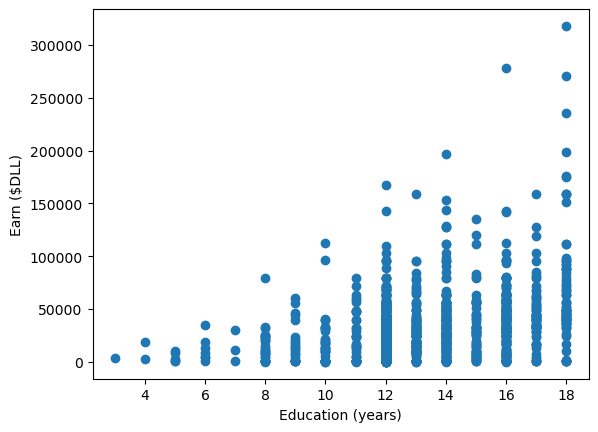

In [12]:
plt.scatter(datos['ed'], datos['earn']);
plt.xlabel('Education (years)')
plt.ylabel('Earn ($DLL)')

In [17]:
# ols: ordinary least squares
y = datos['earn']
x = datos['ed']
X = sm.add_constant(x)
model = sm.OLS(y, X)

In [18]:
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     192.7
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           4.19e-41
Time:                        19:07:23   Log-Likelihood:                -16139.
No. Observations:                1379   AIC:                         3.228e+04
Df Residuals:                    1377   BIC:                         3.229e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.753e+04   4391.609     -6.268      0.000   -3.61e+04   -1.89e+04
ed          4490.6976    323.500     13.882      0.000    3856.091    5125.304
==============================================================================
Omnibus:                      820.405   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11524.806
Skew:                           2.503   Prob(JB):                         0.00
Kurtosis:                      16.249   Cond. No.                         76.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model.params[1]

4490.697624867214

In [26]:
# intervalo de confianza al 95 con bootstrapping

def bootstrapping(datos):
    datos_sample = datos.sample(frac=1, replace=True)
    y = datos_sample['earn']
    x = datos_sample['ed']
    X = sm.add_constant(x)
    model_boot = sm.OLS(y, X).fit()
    return model_boot.params[1]

B = 2500
# vector para guardar resultados
b_vec_boot = np.zeros(B)

for i in range(B):
    b_vec_boot[i] = bootstrapping(datos)


ci_95 = np.percentile(b_vec_boot, [2.5, 97.5])
# met paramétrico 3856.091 	5125.304
print(ci_95)

[3694.67824702 5274.89650045]


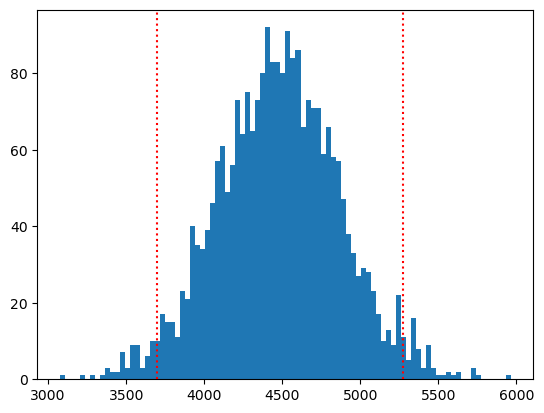

In [30]:
plt.hist(b_vec_boot, bins=90);
plt.axvline(ci_95[0], color='red', linestyle=':')
plt.axvline(ci_95[1], color='red', linestyle=':')

In [31]:
y = datos['earn']
x = datos[['ed', 'age']]
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     109.5
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           7.54e-45
Time:                        19:40:19   Log-Likelihood:                -16127.
No. Observations:                1379   AIC:                         3.226e+04
Df Residuals:                    1376   BIC:                         3.228e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.113e+04   5193.558     -7.920      0.000   -5.13e+04   -3.09e+04
ed          4692.8821    323.666     14.499      0.000    4057.949    5327.815
age          240.5793     49.991      4.812      0.000     142.513     338.645
==============================================================================
Omnibus:                      821.860   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11847.080
Skew:                           2.499   Prob(JB):                         0.00
Kurtosis:                      16.462   Cond. No.                         330.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
new_data = pd.DataFrame({'ed': [15], 'age': [35]})
new_data = sm.add_constant(new_data)
model.predict(new_data)

,ed,age
0,15,35


In [42]:
y = datos['earn']
x = datos[['ed', 'age', 'height']]
X = sm.add_constant(x)
model2 = sm.OLS(y, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     121.9
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           5.26e-70
Time:                        19:53:07   Log-Likelihood:                -16066.
No. Observations:                1379   AIC:                         3.214e+04
Df Residuals:                    1375   BIC:                         3.216e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.886e+05    1.4e+04    -13.460      0.000   -2.16e+05   -1.61e+05
ed          4348.0265    311.333     13.966      0.000    3737.288    4958.765
age          306.0910     48.205      6.350      0.000     211.528     400.654
height      2239.7379    198.962     11.257      0.000    1849.435    2630.040
==============================================================================
Omnibus:                      843.465   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13483.472
Skew:                           2.551   Prob(JB):                         0.00
Kurtosis:                      17.445   Cond. No.                     1.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""